In [472]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

In [473]:
!pip install xlrd


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [474]:
df = pd.read_csv("arrests_procesado.csv")

In [475]:
df.head()

,ID,Date,PD_CD,PD_DESC,KY_CD,Description,Law,Category,Borough,Precint,...,Age,Sex,Race,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Month,Day
0,85594383,2012-07-05,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Manhattan,25,...,45-64,M,BLACK,1003300.0,5230799.0,40.766905,-73.913327,POINT (-73.91332699999998 54.37290151600007),July,Thursday
1,84747924,2012-05-15,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Bronx,40,...,25-44,M,WHITE HISPANIC,1007098.0,3234465.0,40.838172,-73.905813,POINT (-73.90581255299998 49.009891884000076),May,Tuesday
2,84164045,2012-04-11,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 1401000,Misdemeanor,Bronx,47,...,25-44,M,BLACK,1027676.0,2261851.0,40.838172,-73.828816,POINT (-73.828816465 46.36334352800003),April,Wednesday
3,82437256,2012-01-02,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601502,Felony,Bronx,52,...,18-24,M,BLACK,1013626.0,3253434.0,40.838172,-73.878793,POINT (-73.87879308899994 49.06130772800003),January,Monday
4,82300383,2011-12-22,782.0,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,Misdemeanor,Bronx,47,...,25-44,M,BLACK,1027676.0,2261851.0,40.838172,-73.828816,POINT (-73.828816465 46.36334352800003),December,Thursday


In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5299706 entries, 0 to 5299705
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ID            int64  
 1   Date          object 
 2   PD_CD         float64
 3   PD_DESC       object 
 4   KY_CD         float64
 5   Description   object 
 6   Law           object 
 7   Category      object 
 8   Borough       object 
 9   Precint       int64  
 10  Jurisdiction  object 
 11  Age           object 
 12  Sex           object 
 13  Race          object 
 14  X_COORD_CD    float64
 15  Y_COORD_CD    float64
 16  Latitude      float64
 17  Longitude     float64
 18  Lon_Lat       object 
 19  Month         object 
 20  Day           object 
dtypes: float64(6), int64(2), object(13)
memory usage: 849.1+ MB


In [477]:
df.describe()

,ID,PD_CD,KY_CD,Precint,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,5.299706e+06,5.299706e+06,5.299706e+06,5.299706e+06,5.299706e+06,5.299706e+06,5.299706e+06,5.299706e+06
mean,1.028483e+08,5.058831e+02,2.983706e+02,6.078782e+01,1.005357e+06,2.145731e+05,4.074174e+01,-7.392377e+01
std,5.859244e+07,2.652387e+02,1.805997e+02,3.435073e+01,2.009380e+04,1.604578e+05,8.097540e-02,7.251739e-02
min,9.926901e+06,1.000000e+00,1.010000e+02,1.000000e+00,9.133570e+05,1.211310e+05,4.049891e+01,-7.425494e+01
25%,6.137396e+07,2.690000e+02,1.260000e+02,3.300000e+01,9.932850e+05,1.868430e+05,4.067944e+01,-7.396739e+01
50%,8.563245e+07,5.110000e+02,3.410000e+02,6.000000e+01,1.004899e+06,2.092220e+05,4.074072e+01,-7.392546e+01
75%,1.500737e+08,7.480000e+02,3.480000e+02,8.400000e+01,1.015938e+06,2.366140e+05,4.081609e+01,-7.388554e+01
max,2.385139e+08,9.970000e+02,9.950000e+02,1.230000e+02,1.067302e+06,8.202360e+06,4.091505e+01,-7.368178e+01


In [478]:
df['Date'] = pd.to_datetime(df['Date'])

In [479]:
df = df.dropna() # ya fue no perdemos nada de informacion

### Parece haber una tendencia a la baja

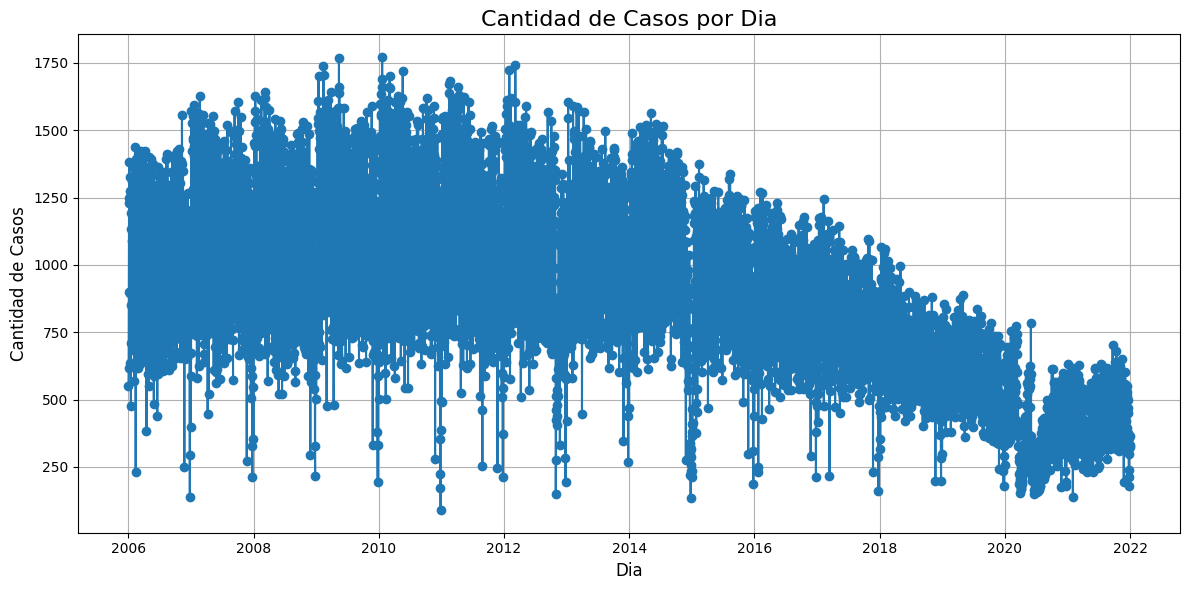

In [480]:
df_dia = df.groupby(df['Date'].dt.to_period('D')).size().reset_index(name='CASE_COUNT')

# Convierte la columna de periodos a datetime para ordenar correctamente
df_dia['Date'] = df_dia['Date'].dt.to_timestamp()

# Visualiza los datos en un gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_dia['Date'], df_dia['CASE_COUNT'], marker='o', linestyle='-')
plt.title('Cantidad de Casos por Dia', fontsize=16)
plt.xlabel('Dia', fontsize=12)
plt.ylabel('Cantidad de Casos', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [481]:
df_dia = df_dia.set_index('Date')
y = df_dia['CASE_COUNT'].resample('D').mean()

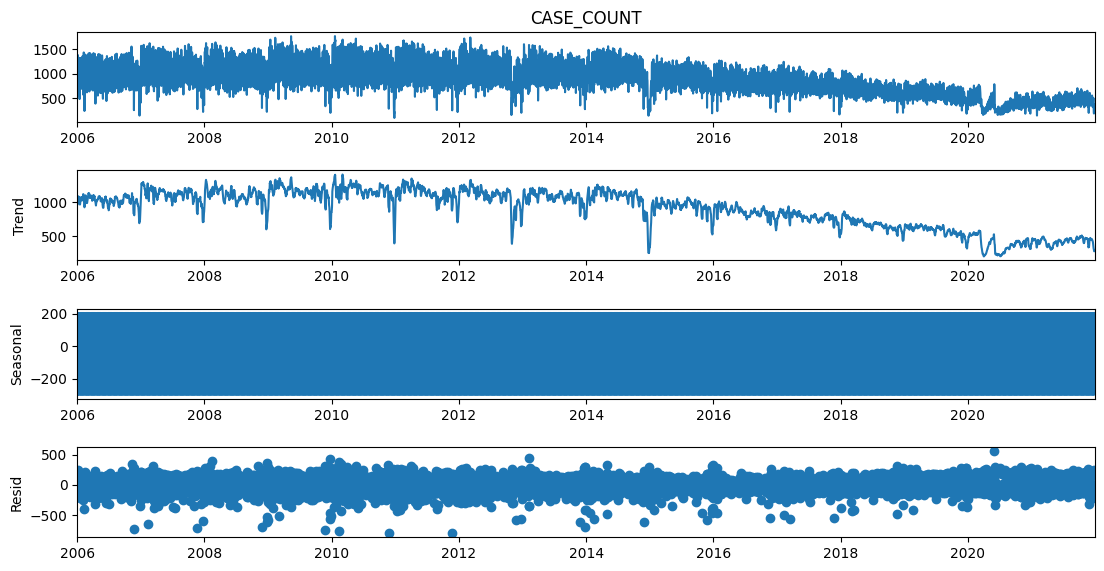

In [482]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 6)

#### Como hay una tendencia negativa, quizas es util usar la descomposicion multiplicativa. Pero, la variacion estacional parece mantenerse constante asi que nose

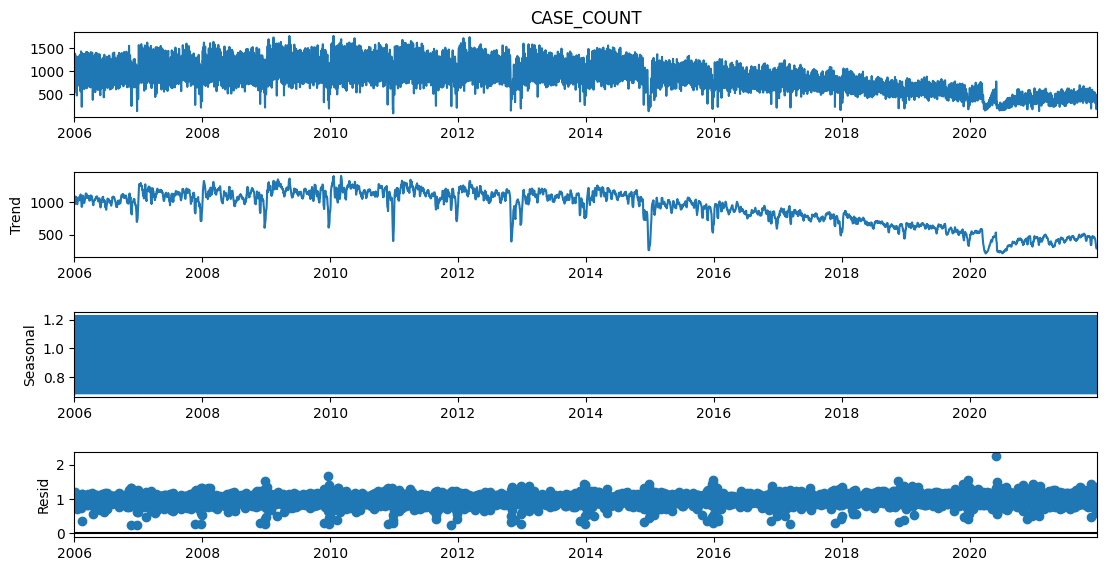

In [483]:
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(12, 6)

### Random Walk

In [484]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_dia, test_size=0.2, shuffle=False, random_state=42)

In [485]:
df_train.tail()

,CASE_COUNT
Date,
2018-10-15,558
2018-10-16,733
2018-10-17,814
2018-10-18,677
2018-10-19,661


In [486]:
df_train['CASE_COUNT_SHIFT1'] = df_train.CASE_COUNT.shift()

df_train['CASE_COUNT_SHIFT1'].fillna(method='bfill', inplace=True)
df_train.head()

,CASE_COUNT,CASE_COUNT_SHIFT1
Date,,
2006-01-01,551,551.0
2006-01-02,618,551.0
2006-01-03,899,618.0
2006-01-04,1229,899.0
2006-01-05,1383,1229.0


<Axes: xlabel='Date'>

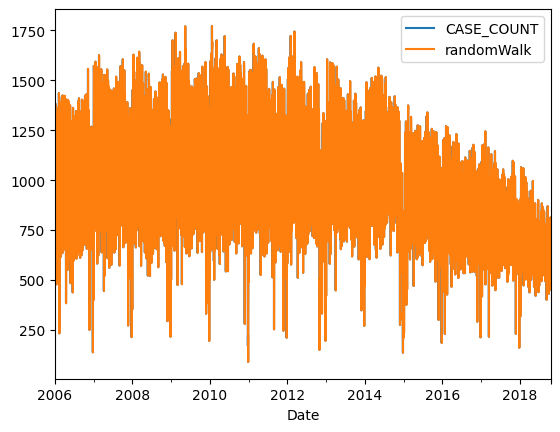

In [487]:
df_train['randomWalk'] = df_train.CASE_COUNT_SHIFT1
df_train.plot(kind='line', y=['CASE_COUNT', 'randomWalk'])

<Axes: xlabel='Date'>

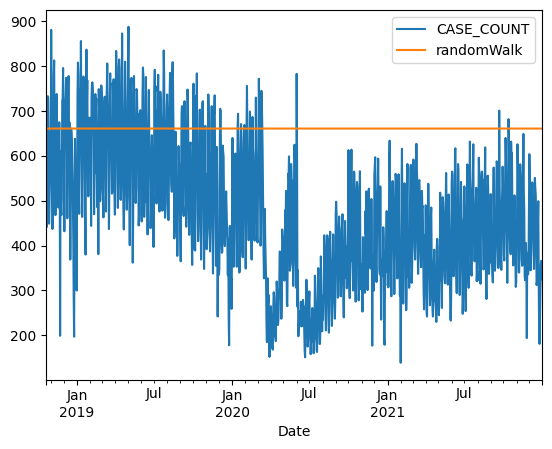

In [488]:
df_test['randomWalk'] = pd.Series(df_train['CASE_COUNT'][-1], index=df_test.index)
df_test.plot(kind='line', y=['CASE_COUNT', 'randomWalk'])

In [489]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [490]:
df_results = pd.DataFrame(columns = ["Model", "RMSE"])
df_results.loc[0, "Model"] = "Random Walk"
df_results.loc[0, "RMSE"] = RMSE(df_test.randomWalk, df_test.CASE_COUNT)
df_results

,Model,RMSE
0,Random Walk,244.370694


In [491]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4675 entries, 2006-01-01 to 2018-10-19
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CASE_COUNT         4675 non-null   int64  
 1   CASE_COUNT_SHIFT1  4675 non-null   float64
 2   randomWalk         4675 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 146.1 KB


In [492]:
model_mean_pred = df_train['CASE_COUNT'].mean()
model_mean_pred

1015.4203208556149

In [493]:
df_train_mc = df_train.copy()
df_train_mc['Mean'] = model_mean_pred

df_test_mc = df_test.copy()
df_test_mc['Mean'] = model_mean_pred

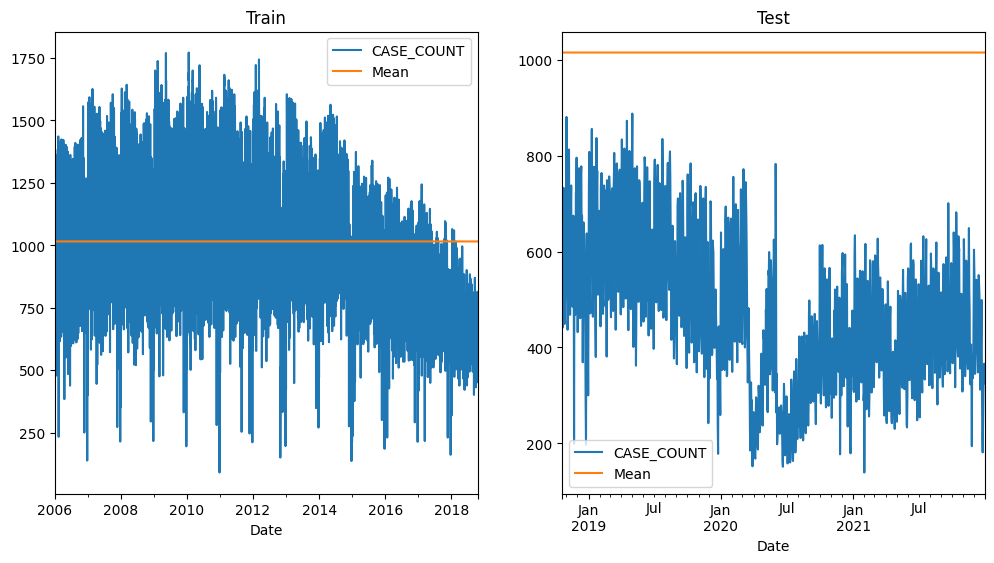

In [494]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df_train_mc.plot(ax=axes[0], y = ["CASE_COUNT","Mean"],title='Train')
df_test_mc.plot(ax=axes[1],y = ["CASE_COUNT","Mean"], title='Test')
plt.show()

In [495]:
model_rmse = RMSE(df_test_mc.Mean, df_test_mc.CASE_COUNT)

In [496]:
df_results.loc[1, "Model"] = "Mean"
df_results.loc[1, "RMSE"] = model_rmse
df_results.head()

,Model,RMSE
0,Random Walk,244.370694
1,Mean,564.612685


## Tendencial Lineal

In [497]:
df_dia['timeIndex'] = pd.Series(np.arange(len(df_dia['CASE_COUNT'])), index=df_dia.index)
df_dia.timeIndex.head()

Date
2006-01-01    0
2006-01-02    1
2006-01-03    2
2006-01-04    3
2006-01-05    4
Name: timeIndex, dtype: int32

In [498]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_dia, test_size=0.2, shuffle=False, random_state=42)

In [499]:
import statsmodels.formula.api as smf
model_linear = smf.ols(formula='CASE_COUNT ~ timeIndex', data=df_train).fit()

In [500]:
df_train['LinearTrend'] = model_linear.predict(df_train.timeIndex)
df_test['LinearTrend'] = model_linear.predict(df_test.timeIndex)

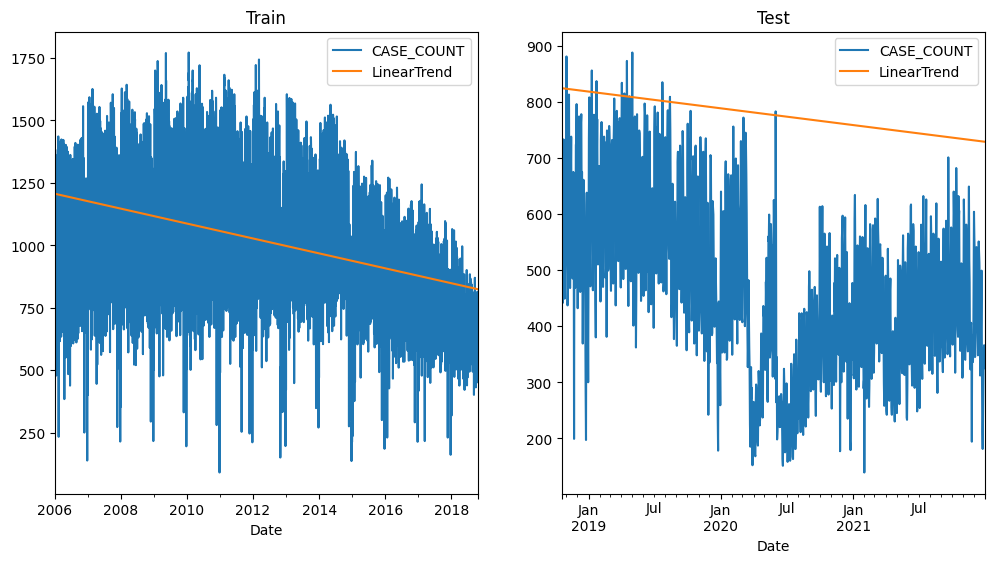

In [501]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
df_train.plot(kind="line", y = ["CASE_COUNT", "LinearTrend"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["CASE_COUNT", "LinearTrend"], ax=axes[1], title='Test')
plt.show()

In [502]:
model_rmse = RMSE(df_test.LinearTrend, df_test.CASE_COUNT)

In [503]:
df_results.loc[2, "Model"] = "Linear Trend"
df_results.loc[2, "RMSE"] = model_rmse
df_results.head()

,Model,RMSE
0,Random Walk,244.370694
1,Mean,564.612685
2,Linear Trend,336.575295


In [504]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASE_COUNT   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     725.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          9.93e-149
Time:                        16:00:28   Log-Likelihood:                -32974.
No. Observations:                4675   AIC:                         6.595e+04
Df Residuals:                    4673   BIC:                         6.596e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1206.4181      8.187    147.364      0.000    1190.368    1222.468
timeIndex     -0.0817      0.003    -26.941      0.000      -0.088      -0.076
==============================================================================
Omnibus:                      105.466   Durbin-Watson:                   0.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.725
Skew:                          -0.219   Prob(JB):                     1.32e-17
Kurtosis:                       2.544   Cond. No.                     5.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Tendencia Cuadratica

In [505]:
df_dia['timeIndex_sq'] = df_dia['timeIndex'] ** 2
df_dia.timeIndex_sq.head()

Date
2006-01-01     0
2006-01-02     1
2006-01-03     4
2006-01-04     9
2006-01-05    16
Name: timeIndex_sq, dtype: int32

In [506]:
df_train, df_test = train_test_split(df_dia, test_size=0.2, shuffle=False, random_state=42)
model_quadratic = smf.ols(formula='CASE_COUNT ~ timeIndex + timeIndex_sq', data=df_train).fit()
df_train['QuadraticTrend'] = model_quadratic.predict(df_train[['timeIndex', 'timeIndex_sq']])
df_test['QuadraticTrend'] = model_quadratic.predict(df_test[['timeIndex', 'timeIndex_sq']])

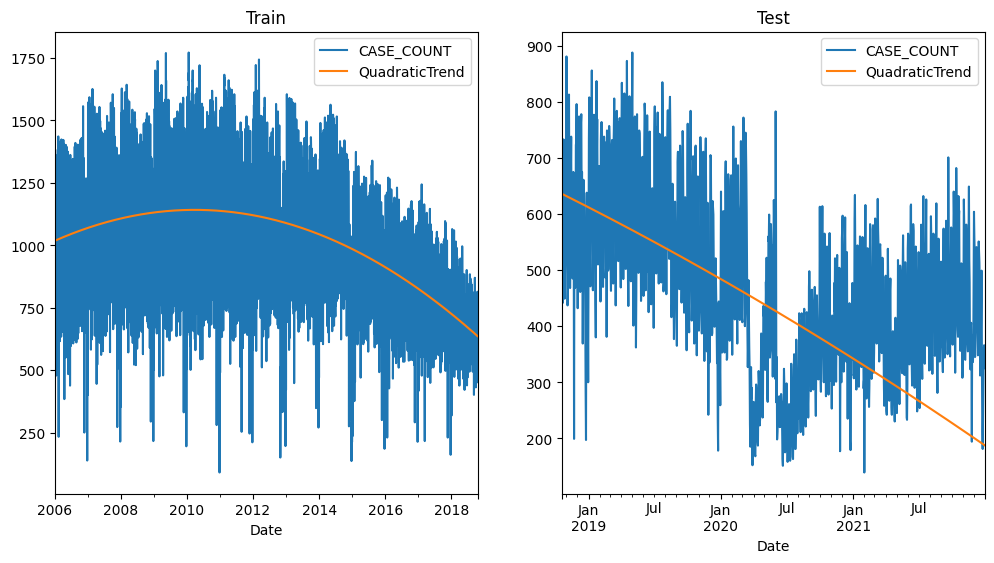

In [507]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
df_train.plot(kind="line", y = ["CASE_COUNT", "QuadraticTrend"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["CASE_COUNT", "QuadraticTrend"], ax=axes[1], title='Test')
plt.show()

In [508]:
model_rmse = RMSE(df_test.QuadraticTrend, df_test.CASE_COUNT)

In [509]:
df_results.loc[3, "Model"] = "Quadratic Trend"
df_results.loc[3, "RMSE"] = model_rmse
df_results.head()

,Model,RMSE
0,Random Walk,244.370694
1,Mean,564.612685
2,Linear Trend,336.575295
3,Quadratic Trend,157.446619


In [510]:
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             CASE_COUNT   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     631.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.47e-243
Time:                        16:00:29   Log-Likelihood:                -32752.
No. Observations:                4675   AIC:                         6.551e+04
Df Residuals:                    4672   BIC:                         6.553e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1018.1655     11.709     86.959      0.000     995.211    1041.120
timeIndex        0.1600      0.012     13.827      0.000       0.137       0.183
timeIndex_sq -5.171e-05    2.4e-06    -21.576      0.000   -5.64e-05    -4.7e-05
==============================================================================
Omnibus:                      159.108   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.103
Skew:                          -0.443   Prob(JB):                     5.18e-37
Kurtosis:                       2.730   Cond. No.                     2.93e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Tendencia con Tranformacion Logaritmica

In [511]:
df_train['log_ventas'] = np.log(df_train.CASE_COUNT)
df_test['log_ventas'] = np.log(df_test.CASE_COUNT)

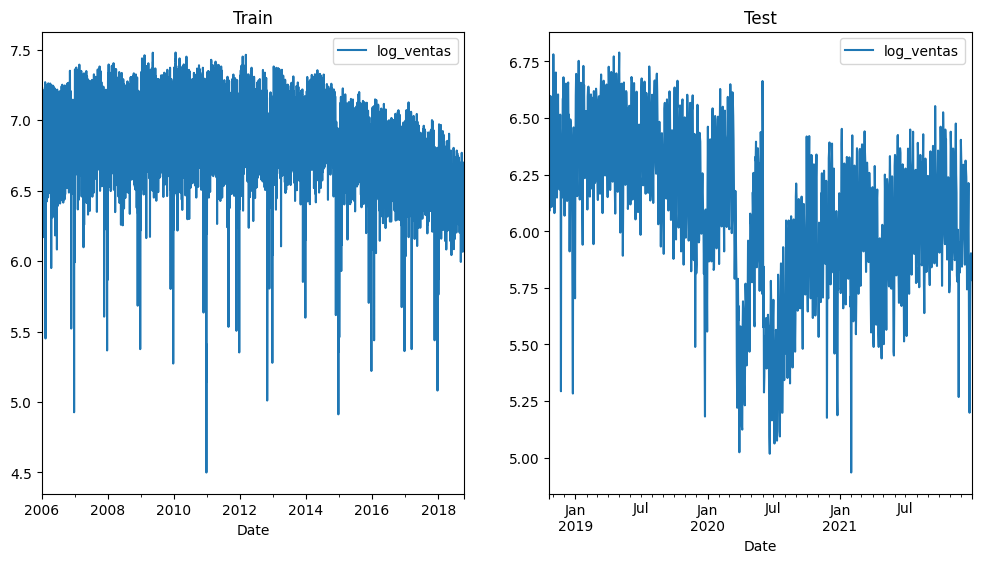

In [512]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
df_train.plot(kind="line", y = ["log_ventas"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["log_ventas"], ax=axes[1], title='Test')
plt.show()

In [513]:
model_log = smf.ols(formula='log_ventas ~ timeIndex', data=df_train).fit()
df_train['LogTrend'] = model_log.predict(df_train[['timeIndex']])
df_test['LogTrend'] = model_log.predict(df_test[['timeIndex']])
df_train['back_LogTrend'] = np.exp(df_train['LogTrend'])
df_test['back_LogTrend'] = np.exp(df_test['LogTrend'])

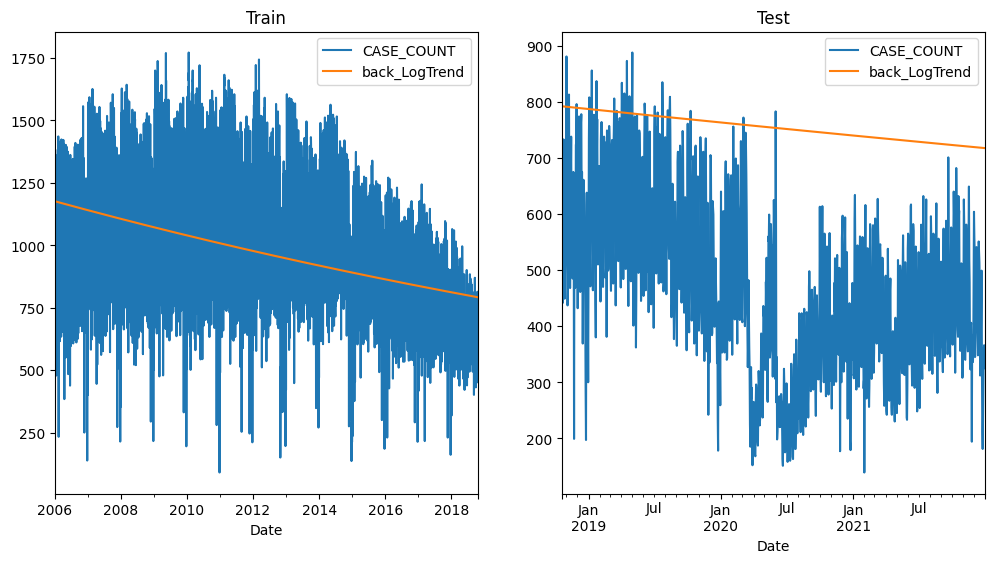

In [514]:
fig, axes = plt.subplots(1,2, figsize=(12,6))  
df_train.plot(kind="line", y = ["CASE_COUNT", "back_LogTrend"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["CASE_COUNT", "back_LogTrend"], ax=axes[1], title='Test')
plt.show()

In [515]:
model_rmse = RMSE(df_test.back_LogTrend, df_test.CASE_COUNT)
df_results.loc[4, "Model"] = "back_LogTrend"
df_results.loc[4, "RMSE"] = model_rmse
df_results.head()

,Model,RMSE
0,Random Walk,244.370694
1,Mean,564.612685
2,Linear Trend,336.575295
3,Quadratic Trend,157.446619
4,back_LogTrend,317.401662


In [516]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_ventas   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     613.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.97e-127
Time:                        16:00:29   Log-Likelihood:                -1233.2
No. Observations:                4675   AIC:                             2470.
Df Residuals:                    4673   BIC:                             2483.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0702      0.009    767.258      0.000       7.052       7.088
timeIndex   -8.46e-05   3.41e-06    -24.776      0.000   -9.13e-05   -7.79e-05
==============================================================================
Omnibus:                     1187.506   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.129
Skew:                          -1.271   Prob(JB):                         0.00
Kurtosis:                       6.684   Cond. No.                     5.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Transformacion logaritmioca + Estacionalidad Mensual

In [517]:
df_train['month'] = [d.strftime('%b') for d in df_train.index]
df_test['month'] = [d.strftime('%b') for d in df_test.index]

In [518]:
dummies_mes_train = pd.get_dummies(df_train.month)
dummies_mes_test = pd.get_dummies(df_test.month)

In [519]:
df_train = df_train.join(dummies_mes_train)
df_test = df_test.join(dummies_mes_test)
df_train.head()

,CASE_COUNT,timeIndex,timeIndex_sq,QuadraticTrend,log_ventas,LogTrend,back_LogTrend,month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Date,,,,,,,,,,,,,,,,,,,,
2006-01-01,551,0,0,1018.165509,6.311735,7.070170,1176.348123,Jan,False,False,False,False,True,False,False,False,False,False,False,False
2006-01-02,618,1,1,1018.325440,6.426488,7.070086,1176.248609,Jan,False,False,False,False,True,False,False,False,False,False,False,False
2006-01-03,899,2,4,1018.485268,6.801283,7.070001,1176.149103,Jan,False,False,False,False,True,False,False,False,False,False,False,False
2006-01-04,1229,3,9,1018.644993,7.113956,7.069916,1176.049606,Jan,False,False,False,False,True,False,False,False,False,False,False,False
2006-01-05,1383,4,16,1018.804614,7.232010,7.069832,1175.950117,Jan,False,False,False,False,True,False,False,False,False,False,False,False


### prediction

In [520]:
model_log_est = smf.ols(formula='log_ventas ~ timeIndex + Apr + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep', data=df_train).fit()
df_train['model_log_est'] = model_log_est.predict(df_train[['timeIndex', "Apr","Aug", "Dec", "Feb", "Jan",\
                                               "Jul", "Jun", "Mar", "May","Nov", "Oct", "Sep"]])
df_test['model_log_est'] = model_log_est.predict(df_test[['timeIndex', "Apr","Aug", "Dec", "Feb", "Jan",\
                                               "Jul", "Jun", "Mar", "May","Nov", "Oct", "Sep"]])

In [521]:
df_test

,CASE_COUNT,timeIndex,timeIndex_sq,QuadraticTrend,log_ventas,LogTrend,back_LogTrend,month,Apr,Aug,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,model_log_est
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-20,546,4675,21855625,635.846543,6.302619,6.674668,792.084053,Oct,False,False,...,False,False,False,False,False,False,False,True,False,6.706796
2018-10-21,441,4676,21864976,635.522949,6.089045,6.674583,792.017046,Oct,False,False,...,False,False,False,False,False,False,False,True,False,6.706712
2018-10-22,608,4677,21874329,635.199252,6.410175,6.674498,791.950044,Oct,False,False,...,False,False,False,False,False,False,False,True,False,6.706628
2018-10-23,682,4678,21883684,634.875451,6.525030,6.674414,791.883049,Oct,False,False,...,False,False,False,False,False,False,False,True,False,6.706544
2018-10-24,733,4679,21893041,634.551547,6.597146,6.674329,791.816058,Oct,False,False,...,False,False,False,False,False,False,False,True,False,6.706460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,297,5839,34093921,189.176496,5.693732,6.576194,717.801962,Dec,False,False,...,False,False,False,False,False,False,False,False,False,6.357224
2021-12-28,358,5840,34105600,188.732512,5.880533,6.576109,717.741239,Dec,False,False,...,False,False,False,False,False,False,False,False,False,6.357140
2021-12-29,366,5841,34117281,188.288424,5.902633,6.576025,717.680521,Dec,False,False,...,False,False,False,False,False,False,False,False,False,6.357056


In [522]:
df_train['back_LogEstTrend'] = np.exp(df_train['model_log_est'])
df_test['back_LogEstTrend'] = np.exp(df_test['model_log_est'])

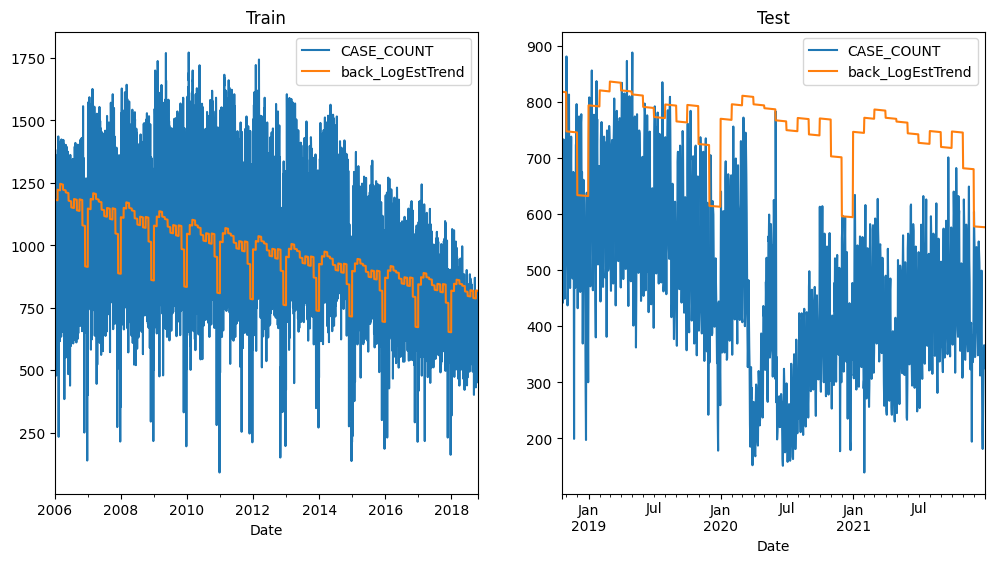

In [523]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
df_train.plot(kind="line", y = ["CASE_COUNT", "back_LogEstTrend"], ax=axes[0], title='Train')
df_test.plot(kind="line", y = ["CASE_COUNT", "back_LogEstTrend"], ax=axes[1], title='Test')
plt.show()

In [524]:
model_rmse = RMSE(df_test.back_LogEstTrend, df_test.CASE_COUNT)
df_results.loc[5, "Model"] = "back_LogEstTrend"
df_results.loc[5, "RMSE"] = model_rmse
df_results

,Model,RMSE
0,Random Walk,244.370694
1,Mean,564.612685
2,Linear Trend,336.575295
3,Quadratic Trend,157.446619
4,back_LogTrend,317.401662
5,back_LogEstTrend,318.614055


## Media Movil

In [525]:
df_dia['sma_5'] = df_dia.CASE_COUNT.rolling(5, min_periods=1).mean()
df_dia['sma_15'] = df_dia.CASE_COUNT.rolling(15, min_periods=1).mean()

<Axes: title={'center': 'SMA'}, xlabel='Date'>

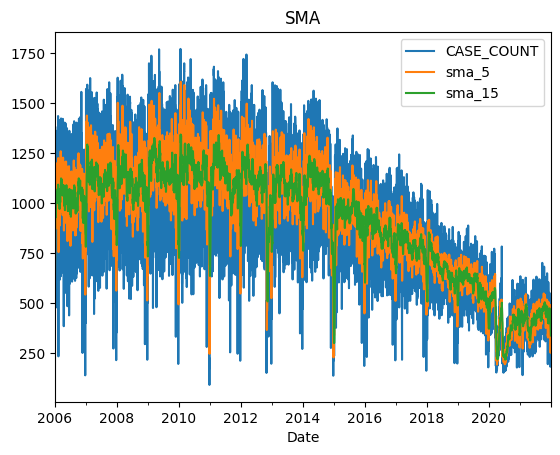

In [526]:
df_dia.plot(kind="line", y = ["CASE_COUNT", "sma_5", "sma_15"], title='SMA')

## Single Exponential Smoothing

In [527]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model_exp_smoothing_0 = SimpleExpSmoothing(df_train.CASE_COUNT).fit(smoothing_level=0, optimized=False)
model_exp_smoothing_03 = SimpleExpSmoothing(df_train.CASE_COUNT).fit(smoothing_level=0.3, optimized=False)
model_exp_smoothing_1 = SimpleExpSmoothing(df_train.CASE_COUNT).fit(smoothing_level=1, optimized=False)


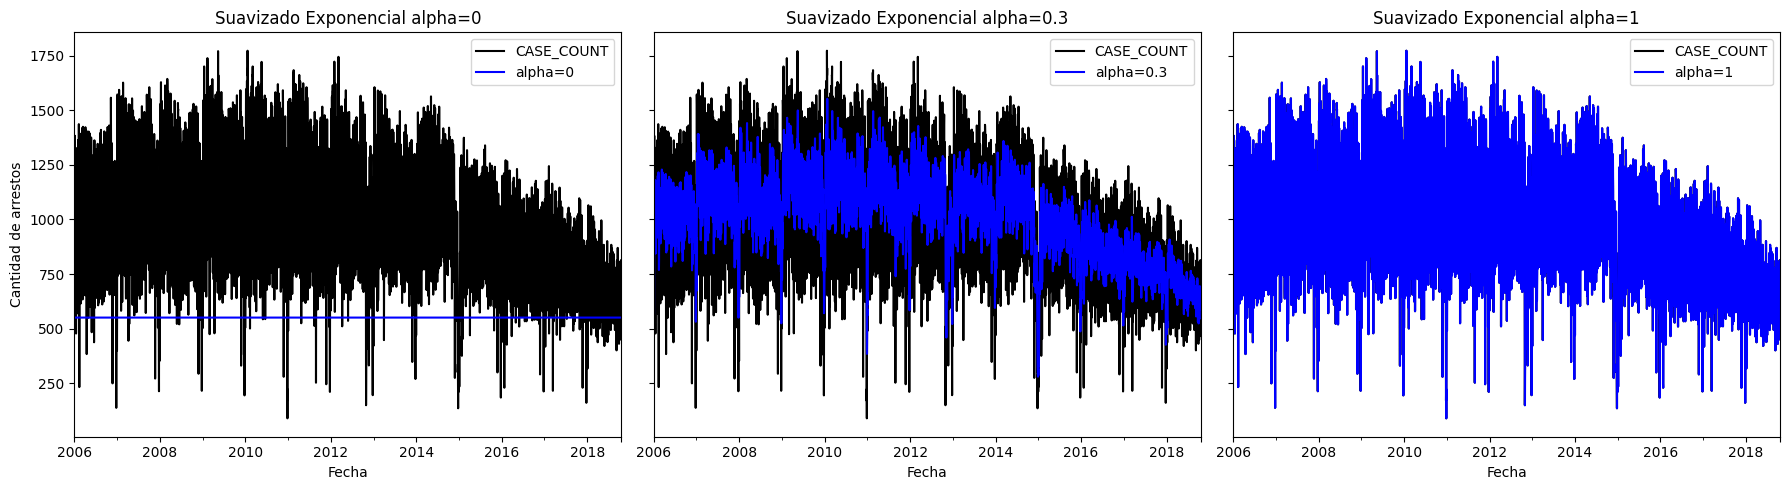

In [528]:
models = {
    "alpha=0": model_exp_smoothing_0,
    "alpha=0.3": model_exp_smoothing_03,
    "alpha=1": model_exp_smoothing_1,
}

# Graficar cada modelo en un gráfico separado
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

for ax, (alpha, model) in zip(axes, models.items()):
    df_train.plot(kind="line", y="CASE_COUNT", color='black', ax=ax, title=f"Suavizado Exponencial {alpha}")
    model.fittedvalues.plot(ax=ax, label=alpha, color='blue')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Cantidad de arrestos')
    ax.legend()

plt.tight_layout()
plt.show()

In [529]:
df_test['simple_smoothing_0'] = model_exp_smoothing_0.forecast(len(df_test))
df_test['simple_smoothing_03'] = model_exp_smoothing_03.forecast(len(df_test))
df_test['simple_smoothing_1'] = model_exp_smoothing_1.forecast(len(df_test))

In [530]:
model_rmse_0 = RMSE(df_test.simple_smoothing_0, df_test.CASE_COUNT)
model_rmse_03 = RMSE(df_test.simple_smoothing_03, df_test.CASE_COUNT)
model_rmse_1 = RMSE(df_test.simple_smoothing_1, df_test.CASE_COUNT)
df_results.loc[6, "Model"] = "simple_smoothing_0"
df_results.loc[6, "RMSE"] = model_rmse_0
df_results.loc[7, "Model"] = "simple_smoothing_03"
df_results.loc[7, "RMSE"] = model_rmse_03
df_results.loc[8, "Model"] = "simple_smoothing_1"
df_results.loc[8, "RMSE"] = model_rmse_1
df_results

,Model,RMSE
0,Random Walk,244.370694
1,Mean,564.612685
2,Linear Trend,336.575295
3,Quadratic Trend,157.446619
4,back_LogTrend,317.401662
5,back_LogEstTrend,318.614055
6,simple_smoothing_0,174.34628
7,simple_smoothing_03,256.316308
8,simple_smoothing_1,244.370694


In [531]:
df_dia

,CASE_COUNT,timeIndex,timeIndex_sq,sma_5,sma_15
Date,,,,,
2006-01-01,551,0,0,551.000000,551.000000
2006-01-02,618,1,1,584.500000,584.500000
2006-01-03,899,2,4,689.333333,689.333333
2006-01-04,1229,3,9,824.250000,824.250000
2006-01-05,1383,4,16,936.000000,936.000000
...,...,...,...,...,...
2021-12-27,297,5839,34093921,250.800000,377.666667
2021-12-28,358,5840,34105600,257.600000,375.200000
2021-12-29,366,5841,34117281,288.400000,362.866667


In [532]:
series = df_dia['CASE_COUNT']

In [533]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(series); 
print('ADF Statistic: %f' % result[0]); print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -1.809267
p-value: 0.375871
Valor crítico 1%: -3.43
Valor crítico 5%: -2.86
Valor crítico 10%: -2.57


### p-value > 0.05 asi que la serie es no estacionaria

<Axes: xlabel='Date'>

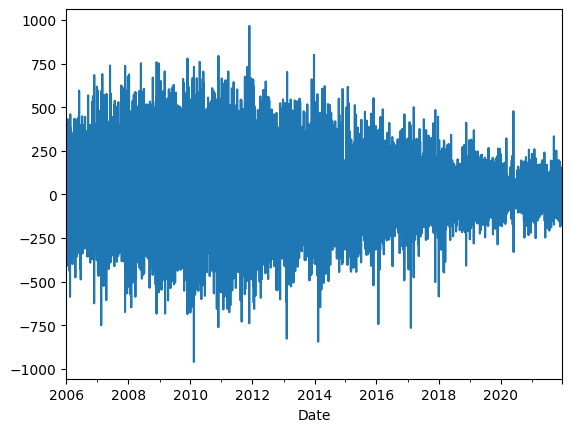

In [534]:
series.diff().plot()

In [535]:
result = adfuller(series.diff()[1:]); print('ADF Statistic: %f' % result[0]); 
print('p-value: %f' % result[1])
for key, value in  result[4].items():
    print('Valor crítico %s: %.2f' % (key,value))

ADF Statistic: -19.541404
p-value: 0.000000
Valor crítico 1%: -3.43
Valor crítico 5%: -2.86
Valor crítico 10%: -2.57


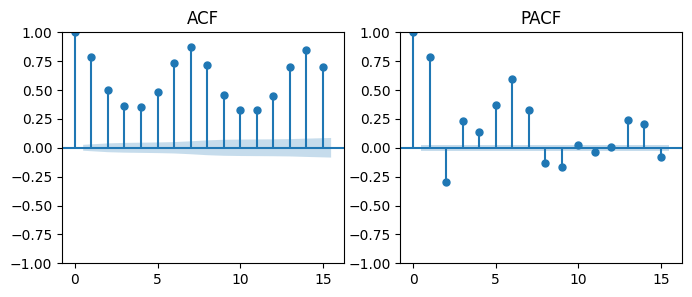

In [536]:
fig, axes = plt.subplots(1, 2,figsize=(8,3))
smt.graphics.plot_acf(series, lags=15,ax=axes[0],title='ACF')
smt.graphics.plot_pacf(series, lags=15,ax=axes[1],title='PACF')
plt.show()


In [537]:
series

Date
2006-01-01     551
2006-01-02     618
2006-01-03     899
2006-01-04    1229
2006-01-05    1383
              ... 
2021-12-27     297
2021-12-28     358
2021-12-29     366
2021-12-30     325
2021-12-31     332
Name: CASE_COUNT, Length: 5844, dtype: int64

### Resample semanalmente con la media para simplificar el modelo

In [538]:
df_dia = df_dia.resample('W').sum()

In [539]:
df_dia

,CASE_COUNT,timeIndex,timeIndex_sq,sma_5,sma_15
Date,,,,,
2006-01-01,551,0,0,551.000000,551.000000
2006-01-08,6907,28,140,6318.083333,5928.904762
2006-01-15,7320,77,875,7487.200000,6944.761167
2006-01-22,7053,126,2296,6898.600000,7180.733333
2006-01-29,7505,175,4403,7479.000000,7188.400000
...,...,...,...,...,...
2021-12-05,3250,40698,236618200,3102.000000,2829.800000
2021-12-12,3210,40747,237188315,3232.200000,3042.600000
2021-12-19,3088,40796,237759116,3166.200000,3221.133333


In [540]:
from sklearn.metrics import mean_squared_error
from math import sqrt

df_train, df_test = train_test_split(
    df_dia, test_size=0.2, shuffle=False, random_state=42
)

# Convertir las columnas en series para trabajar con ARIMA
train = df_train['CASE_COUNT'].values
test = df_test['CASE_COUNT'].values

In [541]:
from pmdarima import auto_arima

# Encuentra automáticamente los mejores valores de (p, d, q)
auto_model = auto_arima(train, seasonal=False, stepwise=True, trace=True, 
                        suppress_warnings=True, max_order=None, max_p=5, max_q=5, d=None, 
                        start_p=0, start_q=0)

params = auto_model.get_params()['order']

print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10867.963, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10836.731, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10794.670, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10865.999, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10736.701, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10738.202, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10738.167, Time=0.31 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10749.435, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10807.212, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10740.389, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10735.376, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=10792.681, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=10834.750, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=10736.802, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0

In [542]:
from statsmodels.tsa.arima.model import ARIMA
# Ajustar el modelo ARIMA con parámetros específicos
model_ARIMA = ARIMA(train, order=params)
results_ARIMA = model_ARIMA.fit()

# Resumen del modelo
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  668
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5364.688
Date:                Wed, 27 Nov 2024   AIC                          10735.376
Time:                        16:00:34   BIC                          10748.885
Sample:                             0   HQIC                         10740.610
                                - 668                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5095      0.034     15.044      0.000       0.443       0.576
ma.L1         -0.9449      0.017    -56.323      0.000      -0.978      -0.912
sigma2      5.622e+05   1.25e+04     44.840      0.0

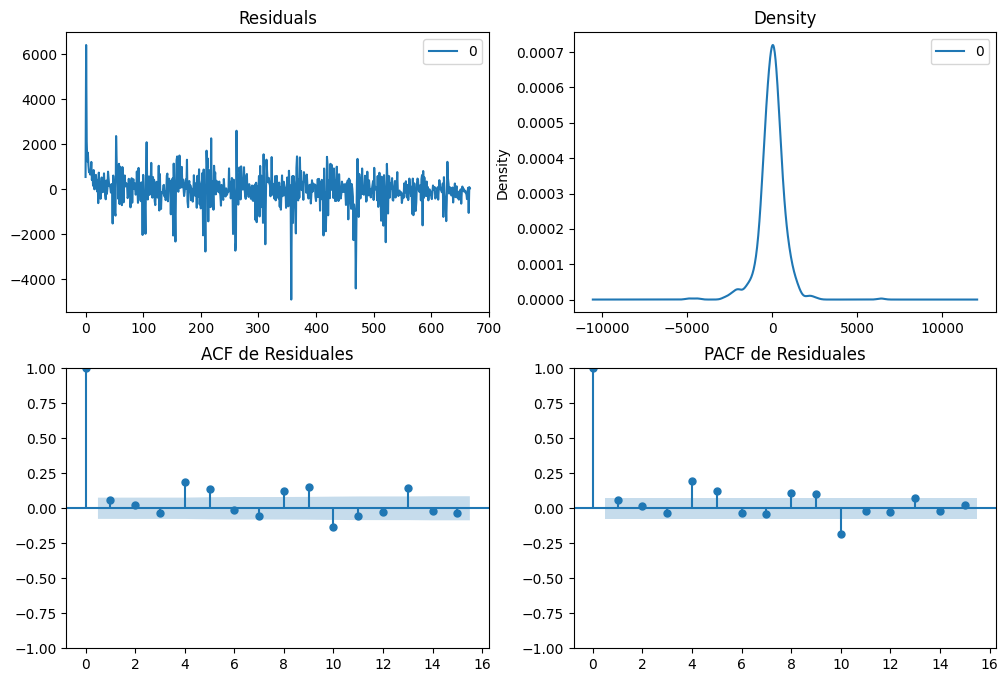

In [543]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Análisis de residuales
residuals = pd.DataFrame(results_ARIMA.resid)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
residuals.plot(title="Residuals", ax=axes[0, 0])
residuals.plot(kind='kde', title='Density', ax=axes[0, 1])
plot_acf(residuals, lags=15, ax=axes[1, 0], title='ACF de Residuales')
plot_pacf(residuals, lags=15, ax=axes[1, 1], title='PACF de Residuales')
plt.show()

#### Los picos de los residuos ACF y PACF se alejan de la franja azul, mostrando que puede haber autocorrelacion

In [544]:
# Entrenar y predecir usando una ventana deslizante
history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=params)  # Usa el mismo orden que antes
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'predicted={yhat:.3f}, expected={obs:.3f}')

predicted=4645.784, expected=4430.000
predicted=4566.547, expected=4338.000
predicted=4506.260, expected=4325.000
predicted=4488.900, expected=4250.000
predicted=4436.580, expected=4081.000
predicted=4329.354, expected=3665.000
predicted=4077.503, expected=4449.000
predicted=4498.463, expected=4635.000
predicted=4601.337, expected=4331.000
predicted=4430.421, expected=3916.000
predicted=4188.566, expected=3101.000
predicted=3707.511, expected=4165.000
predicted=4275.176, expected=4663.000
predicted=4551.770, expected=4599.000
predicted=4522.362, expected=4510.000
predicted=4476.562, expected=4181.000
predicted=4291.844, expected=4809.000
predicted=4641.167, expected=4424.000
predicted=4433.133, expected=4100.000
predicted=4249.483, expected=4309.000
predicted=4358.448, expected=4395.000
predicted=4404.160, expected=4660.000
predicted=4553.455, expected=4457.000
predicted=4445.039, expected=4431.000
predicted=4431.066, expected=4686.000
predicted=4575.056, expected=4632.000
predicted=45

Test RMSE: 396.655


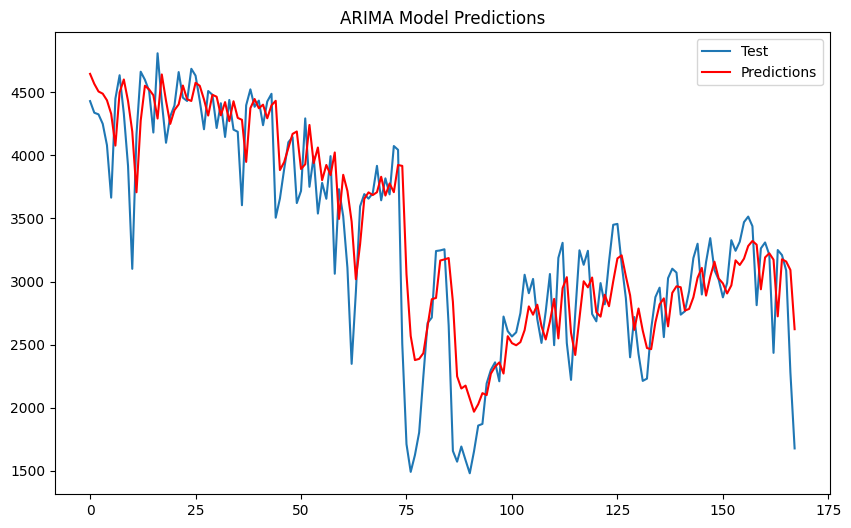

In [545]:
rmse = sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE: {rmse:.3f}')

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.plot(test, label='Test')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

In [546]:
import pickle
## Guardamos modelo
with open("./modelo/modelo_arima_semanal.pkl", "wb") as f:
    pickle.dump(results_ARIMA, f)

In [547]:
df_dia

,CASE_COUNT,timeIndex,timeIndex_sq,sma_5,sma_15
Date,,,,,
2006-01-01,551,0,0,551.000000,551.000000
2006-01-08,6907,28,140,6318.083333,5928.904762
2006-01-15,7320,77,875,7487.200000,6944.761167
2006-01-22,7053,126,2296,6898.600000,7180.733333
2006-01-29,7505,175,4403,7479.000000,7188.400000
...,...,...,...,...,...
2021-12-05,3250,40698,236618200,3102.000000,2829.800000
2021-12-12,3210,40747,237188315,3232.200000,3042.600000
2021-12-19,3088,40796,237759116,3166.200000,3221.133333


In [548]:
df_train = df_train.reset_index().rename(columns={'Date': 'ds', 'CASE_COUNT': 'y'})
df_test = df_test.reset_index().rename(columns={'Date': 'ds', 'CASE_COUNT': 'y'})

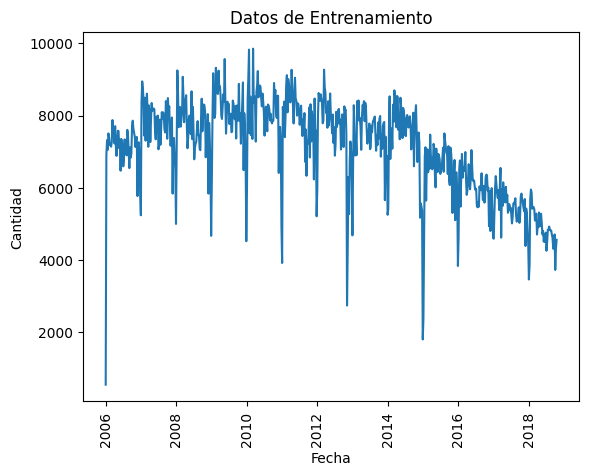

In [549]:
plt.plot(df_train['ds'], df_train['y'])
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.title('Datos de Entrenamiento')
plt.show()

In [550]:
from prophet import Prophet

model = Prophet()
model.fit(df_train)

16:00:52 - cmdstanpy - INFO - Chain [1] start processing
16:00:52 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
with open("./project/modelo_prophet_semanal.pkl", "wb") as f:
    pickle.dump(model, f)

In [551]:
future = model.make_future_dataframe(periods=365)

# Hacer las predicciones
forecast = model.predict(future)

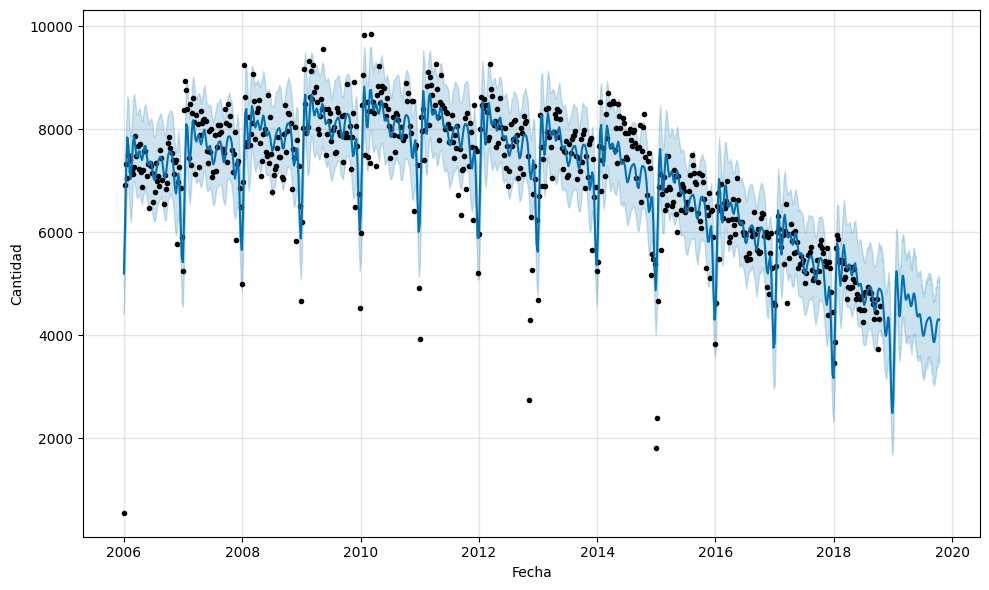

In [552]:
model.plot(forecast)
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.show()

In [553]:
forecast = model.predict(df_test)
rmse = sqrt(mean_squared_error(df_test['y'], forecast['yhat'][-len(df_test):]))
print(f'RMSE: {round(rmse,2)}')

RMSE: 857.7


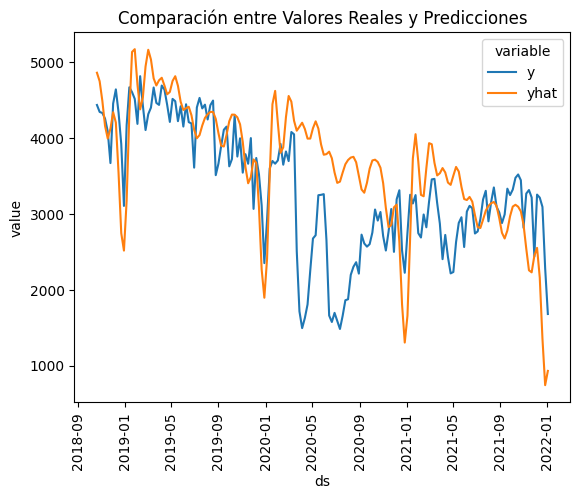

In [554]:
import seaborn as sns
aux = df_test.copy()
aux['yhat'] = forecast['yhat']
aux = pd.melt(aux, id_vars=['ds'], value_vars=['y', 'yhat'])

sns.lineplot(x=aux.ds, y=aux.value, hue=aux.variable)
plt.xticks(rotation=90)
plt.title('Comparación entre Valores Reales y Predicciones')
plt.show()